# Scraping Zoe graphs

This is easy as there is an easy request to get the their **SQL** server :

https://joinzoe.carto.com/api/v2/sql?q=SELECT%20*%20FROM%20uk_active_cases&api_key=iTsdIq-t8_cElnLjNmoRLA


https://covid.joinzoe.com/data#levels-over-time

In [3]:
import requests

In [42]:
url = "https://joinzoe.carto.com/api/v2/sql?q=SELECT%20*%20FROM%20uk_active_cases&api_key=iTsdIq-t8_cElnLjNmoRLA"

r = requests.get(url=url)
r.status_code

200

In [49]:
r.text[:100]

'{"rows":[{"cartodb_id":110880,"the_geom":null,"the_geom_webmercator":null,"date":20200612,"corrected'

In [47]:

data = r.json()

In [44]:
data.keys()

dict_keys(['rows', 'time', 'fields', 'total_rows'])

In [45]:
pts = [ (x['date'], x['corrected_covid_positive']) for x in data['rows'] ]
pts.sort()
X, Y = zip(* pts)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

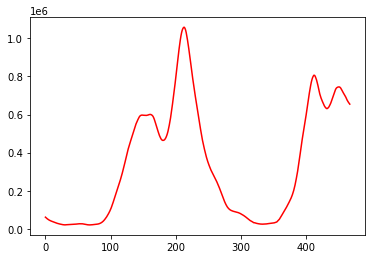

In [46]:
plt.plot(np.arange(len(Y)),Y,'r-');

In [32]:
Y = np.array(Y)
X = np.array(X)

In [35]:
np.where(Y == max(Y))[0][0]

213

In [36]:
X[213]

20210111

In [38]:
url = 'https://joinzoe.carto.com/api/v2/sql?q=SELECT%20SUM(prevalence_map.corrected_covid_positive)%20FROM%20prevalence_map&api_key=iTsdIq-t8_cElnLjNmoRLA'

In [40]:
r = requests.get(url=url)
r.status_code

200